# Text Classification

## Steps to building a text classification model
- Data Loading
- Data Processing
  1. Text Cleaning
  2. Stopwords removal
  3. Lemmatization
  4. Tokenization

- Data splitting
  1. train
  2. val
  3. test

- Model Selection
- Training
- Inference (prediction)

In [ ]:
# Data loading

import pandas as pd

data = pd.read_csv("/content/dataset/NLP_Task_Dataset.csv")

data.head()

,Unnamed: 0,Category,SubCategory,ProductName,Description,Brand Tone,Keywords,Seasonality
0,8037,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ...",formal,"""One, of, Prada's",Spring
1,13670,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na...",luxury,"""Falke, -, Casual",Autumn
2,13983,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo...",luxury,"""White, and, black",Winter
3,12081,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig...",casual,"""Pair, of, rib",Winter
4,15617,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ...",casual,"""Alice, Made, This",Autumn


In [ ]:
# Data Analytics

data = data[["SubCategory", "Description"]]
data.columns = ['label', 'text']

data.head()

,label,text
0,Bags,"""One of Prada's most functional designs, this ..."
1,Socks,"""Falke - Casual yet luxurious, Falke's dark na..."
2,Tuxedos,"""White and black linen blend peak lapel tuxedo..."
3,Gloves,"""Pair of rib knit cashmere gloves in navy. Sig..."
4,Cufflinks,"""Alice Made This - Made in the UK, these teal ..."


In [ ]:
data.isna().sum()

,0
label,37
text,0


In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

,0
label,0
text,0


In [ ]:
data.shape

(4963, 2)

<Axes: xlabel='label'>

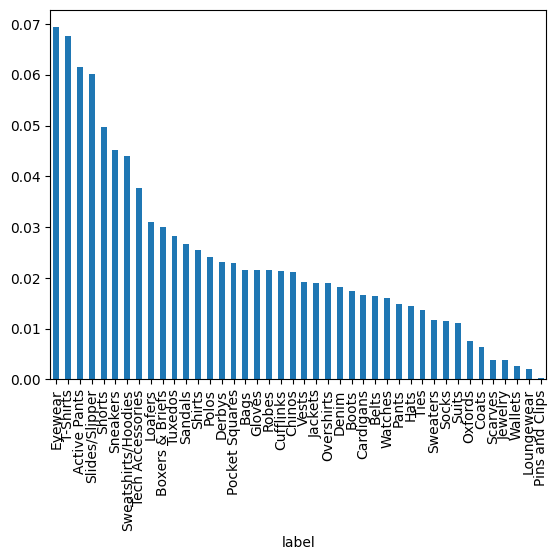

In [ ]:
data['label'].value_counts(normalize = True).plot.bar()

## Process data

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

#Remove Stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

#Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    return text

#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data['text'] = data['text'].apply(lambda x:clean_text(x))
data['text'] = data['text'].apply(stemming)

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text
0,Bags,one prada s function design belt bag made weat...
1,Socks,falk casual yet luxuri falk s dark navi lhasa ...
2,Tuxedos,white black linen blend peak lapel tuxedo suit...
3,Gloves,pair rib knit cashmer glove navi signatur stri...
4,Cufflinks,alic made this made uk teal bayley cufflink al...


## Split Data

In [ ]:
# Create Feature and Label sets
from sklearn.model_selection import train_test_split


X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3970,)
Testing Data :  (993,)


In [ ]:
# train model with pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss


pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', LogisticRegression(solver='sag')),
            ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)


print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

Accuracy =  0.8348439073514602
F1 score is  0.8348439073514602
Hamming Loss is  0.16515609264853978


In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', MultinomialNB()),
            ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

Accuracy =  0.5709969788519638
F1 score is  0.5709969788519638
Hamming Loss is  0.42900302114803623


In [ ]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', LinearSVC()),
            ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

Accuracy =  0.8862034239677744
F1 score is  0.8862034239677744
Hamming Loss is  0.11379657603222558


In [ ]:
from sklearn.svm import SVC

pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=list(stop_words))),
                ('clf', SVC()),
            ])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print('Hamming Loss is ', hamming_loss(y_test, predictions))

Accuracy =  0.8167170191339376
F1 score is  0.8167170191339376
Hamming Loss is  0.18328298086606243
